In [60]:
import json
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import wikipedia
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.feature_selection import RFE, RFECV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import re
from pandas.plotting import register_matplotlib_converters
from sklearn.utils import resample
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.feature_selection import RFE

In [61]:
vids = pd.read_csv('files/df_sans_zero_sentiments.csv')
#filter out outliers with not many comments (not enough comments for sentiment analysis to be robust)
vids = vids[vids['commentCount'] > 100]

In [62]:
#6 equally distributed categories of likes/dislikes ratio
bin_labels = [0, 1, 2, 3, 4, 5]
vids['ratio_bins'] = pd.qcut(vids['ratio'], q=6, labels = bin_labels)

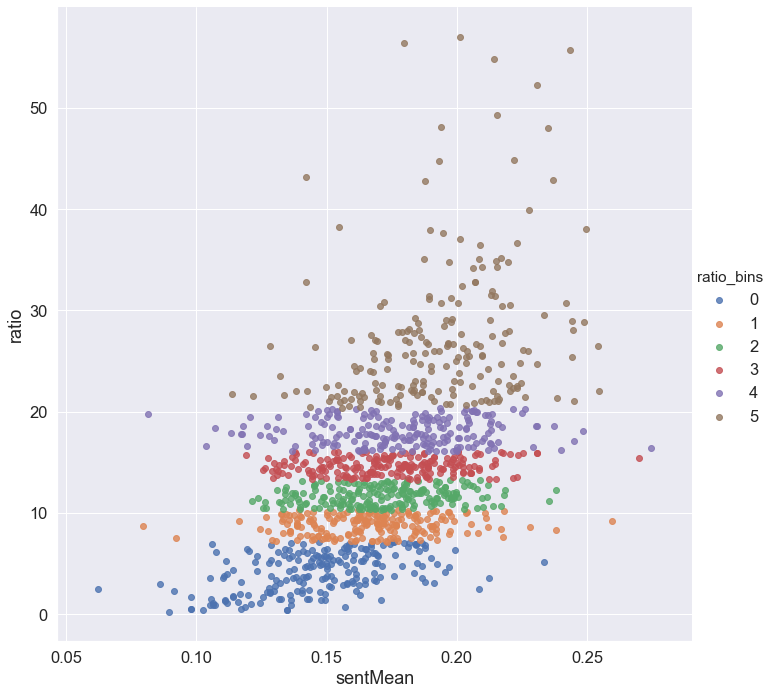

In [63]:
#basic visualisation of ratio between sentiment and ratio
_p = sns.lmplot("sentMean", "ratio", data=vids, fit_reg=False, hue='ratio_bins', height=10)

In [65]:
from scipy import stats
for col in vids.columns[3:]:
    if str(vids[col].dtype) != 'object':
        vids = vids[(np.abs(stats.zscore(vids[col])) < 3)]

## to do: visualisation and exploration of our data

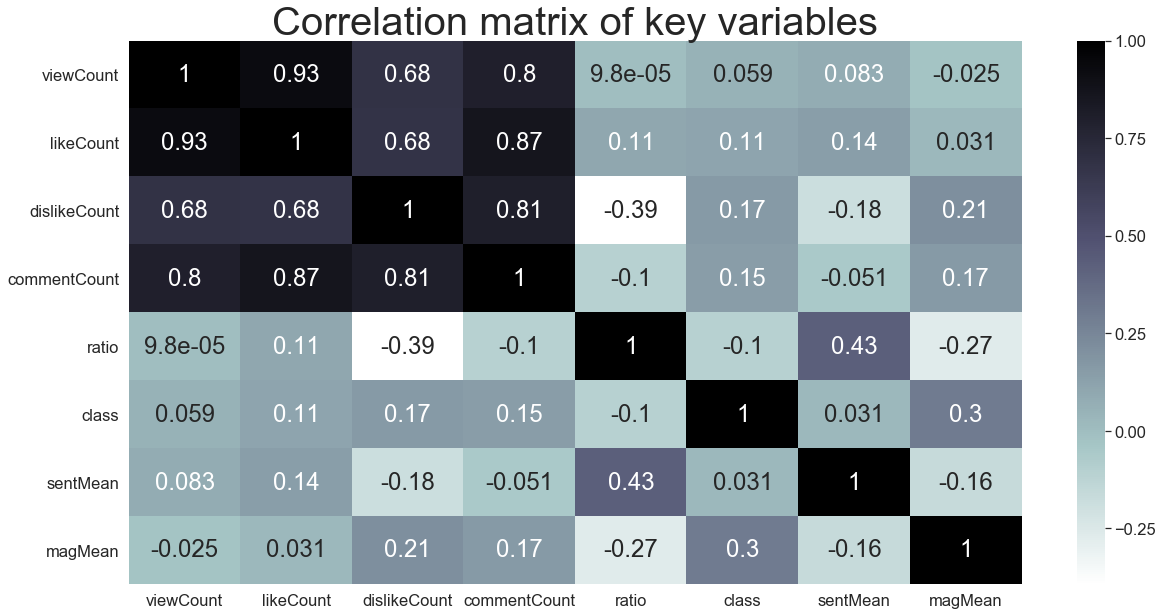

In [66]:
param = ['viewCount', 'likeCount', 'dislikeCount', 'commentCount', 'ratio', 'ratio_bins', 'class', 'sentMean', 'magMean']
corr = vids[param]

plt.figure(figsize=(20, 10))
plt.title('Correlation matrix of key variables', size=40)

sns.heatmap(corr.corr(), cmap = 'bone_r', annot = True, annot_kws = {"size":24})

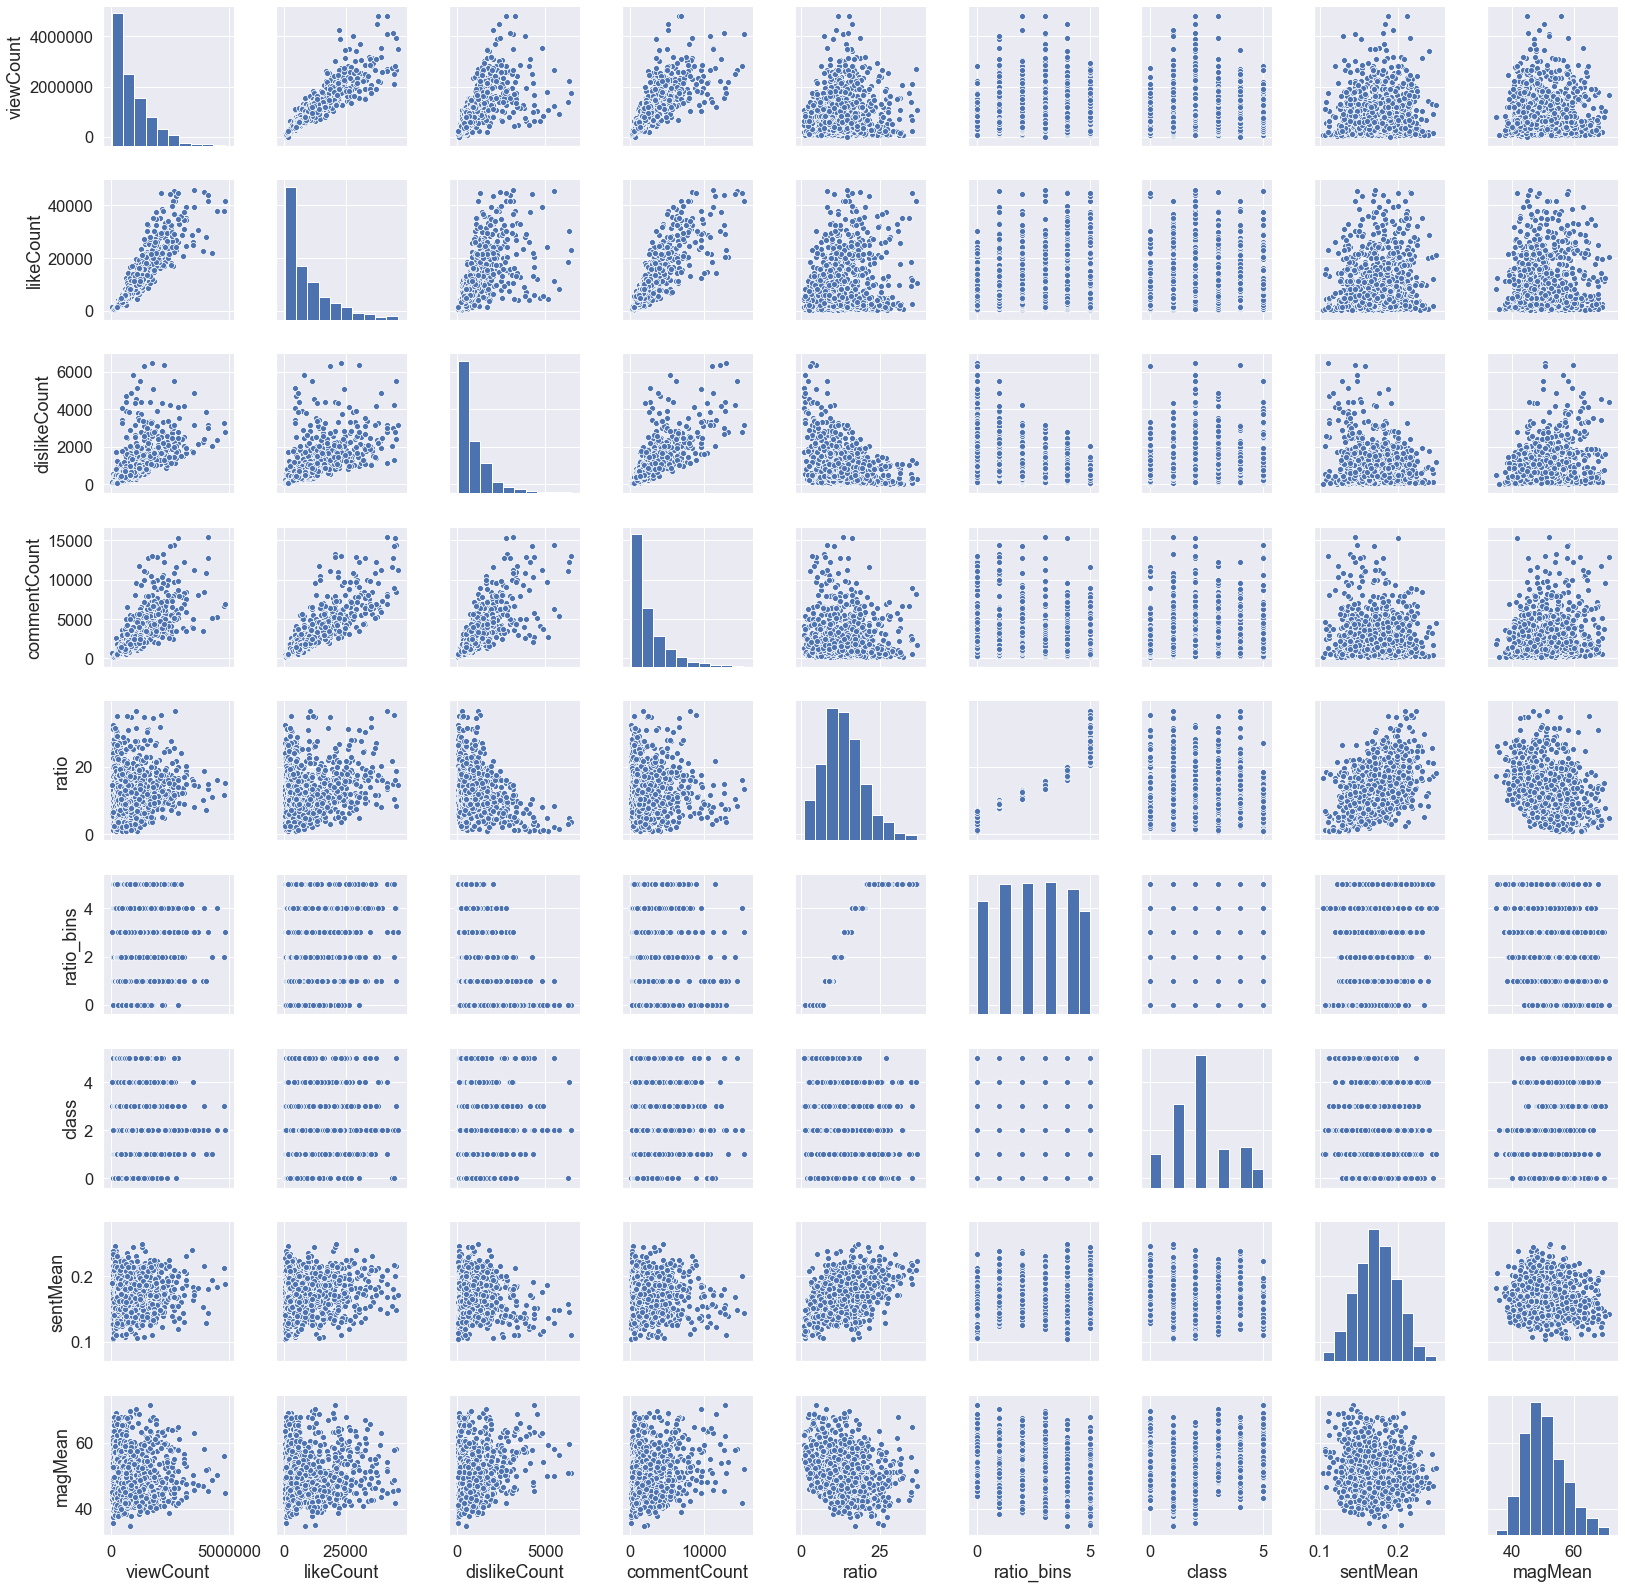

In [67]:
sns.set(font_scale=1.5)
g = sns.pairplot(vids, vars=['viewCount', 'likeCount', 'dislikeCount', 'commentCount', 'ratio', 'ratio_bins', 'class', 'sentMean', 'magMean'])

Min:  12808 views
Mean:  881230.91 views
Median:  634034.0 views
Standard deviation:  808014.05 views
Mode:  391579 views
Max:  4803391 views


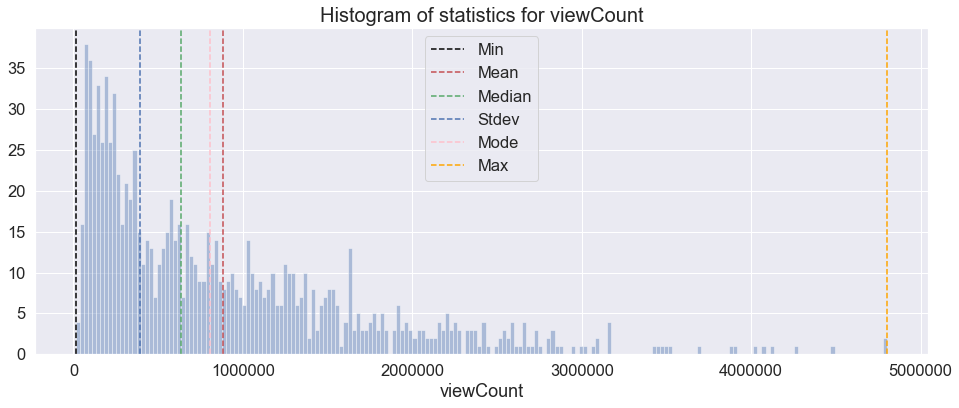

In [236]:
plt.figure(figsize=(16, 6))
min1 = vids['viewCount'].min()
mean = vids['viewCount'].mean()
median = vids['viewCount'].median()
stdev = vids['viewCount'].std()
mode = vids['viewCount'].mode().get_values()[0]
max1 = vids['viewCount'].max()

a = sns.distplot(vids['viewCount'], bins=200, kde=False)
a.axvline(min1, color='black', linestyle='--')
a.axvline(mean, color='r', linestyle='--')
a.axvline(median, color='g', linestyle='--')
a.axvline(mode, color='b', linestyle='--')
a.axvline(stdev, color='pink', linestyle='--')
a.axvline(max1, color='orange', linestyle='--')
a.set_title('Histogram of statistics for viewCount', fontsize=20)
#a.annotate(mean, xy=(2700000, 36))
plt.legend({'Min':min1, 'Mean':mean, 'Median':median, 'Stdev':stdev, 'Mode':mode, 'Max':max1})
print("Min: ", min1, "views")
print("Mean: ", round(mean, 2), "views")
print("Median: ", median, "views")
print("Standard deviation: ", round(stdev, 2), "views")
print("Mode: ", mode, "views")
print("Max: ", max1, "views")

Min:  293 likes
Mean:  9371.61 likes
Median:  5866.0 likes
Standard deviation:  9573.76 likes
Mode:  1507 likes
Max:  45974 likes


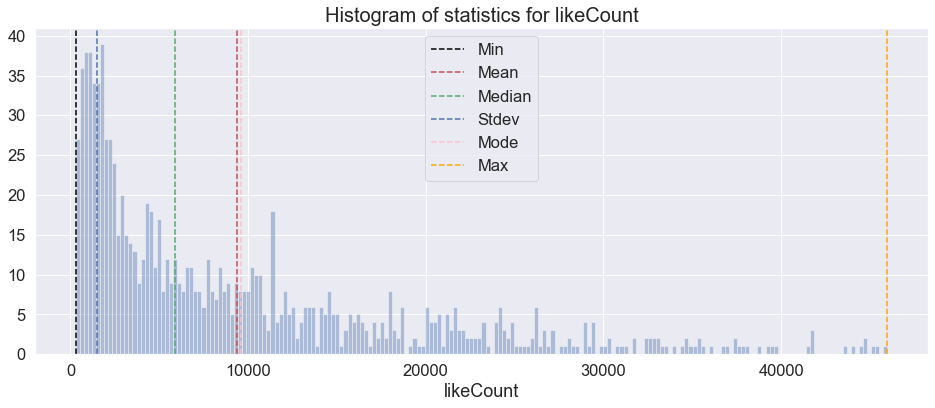

In [237]:
plt.figure(figsize=(16, 6))
min1 = vids['likeCount'].min()
mean = vids['likeCount'].mean()
median = vids['likeCount'].median()
stdev = vids['likeCount'].std()
mode = vids['likeCount'].mode().get_values()[0]
max1 = vids['likeCount'].max()

a = sns.distplot(vids['likeCount'], bins=200, kde=False)
a.axvline(min1, color='black', linestyle='--')
a.axvline(mean, color='r', linestyle='--')
a.axvline(median, color='g', linestyle='--')
a.axvline(mode, color='b', linestyle='--')
a.axvline(stdev, color='pink', linestyle='--')
a.axvline(max1, color='orange', linestyle='--')
a.set_title('Histogram of statistics for likeCount', fontsize=20)
#a.annotate(mean, xy=(2700000, 36))
plt.legend({'Min':min1, 'Mean':mean, 'Median':median, 'Stdev':stdev, 'Mode':mode, 'Max':max1})
print("Min: ", min1, "likes")
print("Mean: ", round(mean, 2), "likes")
print("Median: ", median, "likes")
print("Standard deviation: ", round(stdev, 2), "likes")
print("Mode: ", mode, "likes")
print("Max: ", max1, "likes")

Min:  18 dislikes
Mean:  878.98 dislikes
Median:  538.0 dislikes
Standard deviation:  991.89 dislikes
Mode:  54 dislikes
Max:  6445 dislikes


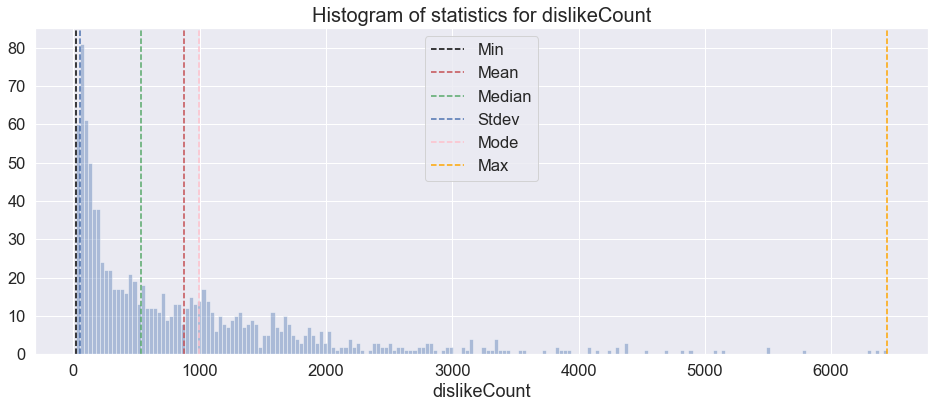

In [238]:
plt.figure(figsize=(16, 6))
min1 = vids['dislikeCount'].min()
mean = vids['dislikeCount'].mean()
median = vids['dislikeCount'].median()
stdev = vids['dislikeCount'].std()
mode = vids['dislikeCount'].mode().get_values()[0]
max1 = vids['dislikeCount'].max()

a = sns.distplot(vids['dislikeCount'], bins=200, kde=False)
a.axvline(min1, color='black', linestyle='--')
a.axvline(mean, color='r', linestyle='--')
a.axvline(median, color='g', linestyle='--')
a.axvline(mode, color='b', linestyle='--')
a.axvline(stdev, color='pink', linestyle='--')
a.axvline(max1, color='orange', linestyle='--')
a.set_title('Histogram of statistics for dislikeCount', fontsize=20)
#a.annotate(mean, xy=(2700000, 36))
plt.legend({'Min':min1, 'Mean':mean, 'Median':median, 'Stdev':stdev, 'Mode':mode, 'Max':max1})
print("Min: ", min1, "dislikes")
print("Mean: ", round(mean, 2), "dislikes")
print("Median: ", median, "dislikes")
print("Standard deviation: ", round(stdev, 2), "dislikes")
print("Mode: ", mode, "dislikes")
print("Max: ", max1, "dislikes")

Min:  110 comments
Mean:  2500.11 comments
Median:  1624.0 comments
Standard deviation:  2524.79 comments
Mode:  718 comments
Max:  15425 comments


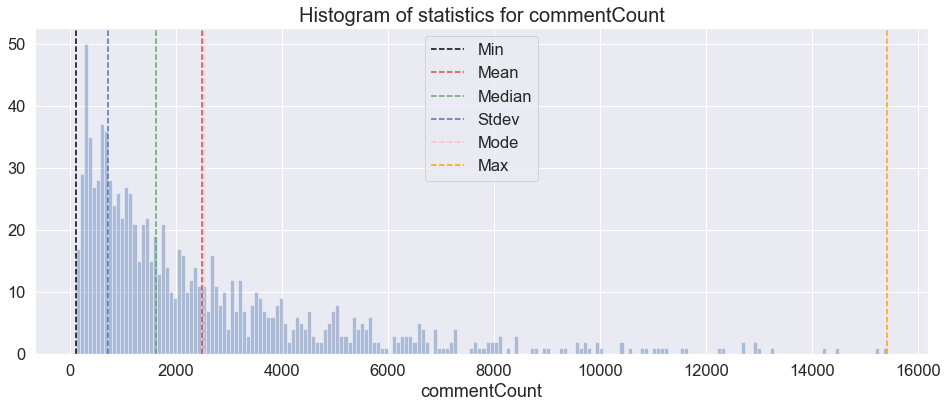

In [239]:
plt.figure(figsize=(16, 6))
min1 = vids['commentCount'].min()
mean = vids['commentCount'].mean()
median = vids['commentCount'].median()
stdev = vids['commentCount'].std()
mode = vids['commentCount'].mode().get_values()[0]
max1 = vids['commentCount'].max()

a = sns.distplot(vids['commentCount'], bins=200, kde=False)
a.axvline(min1, color='black', linestyle='--')
a.axvline(mean, color='r', linestyle='--')
a.axvline(median, color='g', linestyle='--')
a.axvline(mode, color='b', linestyle='--')
a.axvline(stdev, color='pink', linestyle='--')
a.axvline(max1, color='orange', linestyle='--')
a.set_title('Histogram of statistics for commentCount', fontsize=20)
#a.annotate(mean, xy=(2700000, 36))
plt.legend({'Min':min1, 'Mean':mean, 'Median':median, 'Stdev':stdev, 'Mode':mode, 'Max':max1})
print("Min: ", min1, "comments")
print("Mean: ", round(mean, 2), "comments")
print("Median: ", median, "comments")
print("Standard deviation: ", round(stdev, 2), "comments")
print("Mode: ", mode, "comments")
print("Max: ", max1, "comments")

Min:  0.88
Mean:  13.58
Median:  13.06
Standard deviation:  6.58
Mode:  8.17
Max:  36.62


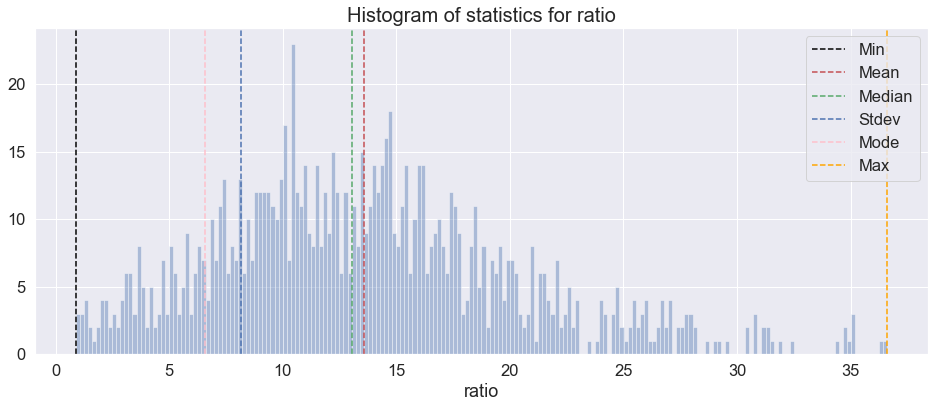

In [242]:
plt.figure(figsize=(16, 6))
min1 = vids['ratio'].min()
mean = vids['ratio'].mean()
median = vids['ratio'].median()
stdev = vids['ratio'].std()
mode = vids['ratio'].mode().get_values()[0]
max1 = vids['ratio'].max()

a = sns.distplot(vids['ratio'], bins=200, kde=False)
a.axvline(min1, color='black', linestyle='--')
a.axvline(mean, color='r', linestyle='--')
a.axvline(median, color='g', linestyle='--')
a.axvline(mode, color='b', linestyle='--')
a.axvline(stdev, color='pink', linestyle='--')
a.axvline(max1, color='orange', linestyle='--')
a.set_title('Histogram of statistics for ratio', fontsize=20)
#a.annotate(mean, xy=(2700000, 36))
plt.legend({'Min':min1, 'Mean':mean, 'Median':median, 'Stdev':stdev, 'Mode':mode, 'Max':max1})
print("Min: ", round(min1, 2))
print("Mean: ", round(mean, 2))
print("Median: ", round(median, 2))
print("Standard deviation: ", round(stdev, 2))
print("Mode: ", round(mode, 2))
print("Max: ", round(max1, 2))

Min:  0
Mode:  3
Max:  5


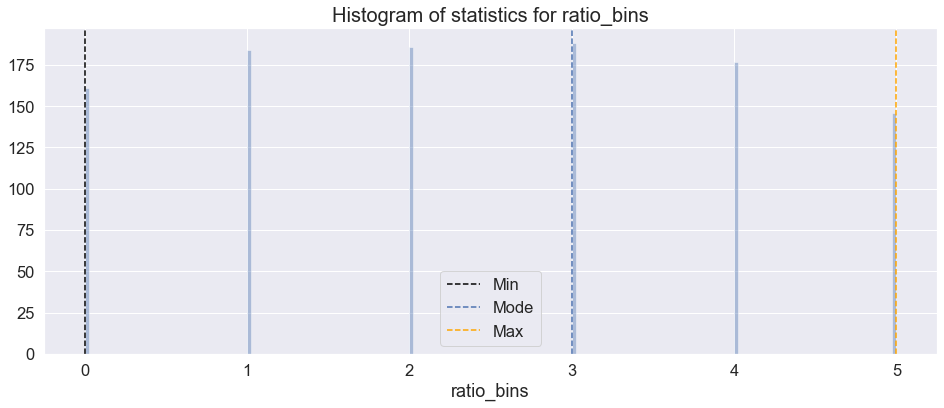

In [248]:
plt.figure(figsize=(16, 6))
min1 = vids['ratio_bins'].min()
#mean = vids['ratio_bins'].mean()
#median = vids['ratio_bins'].median()
#stdev = vids['ratio_bins'].std()
mode = vids['ratio_bins'].mode().get_values()[0]
max1 = vids['ratio_bins'].max()

a = sns.distplot(vids['ratio_bins'], bins=200, kde=False)
a.axvline(min1, color='black', linestyle='--')
#a.axvline(mean, color='r', linestyle='--')
#a.axvline(median, color='g', linestyle='--')
a.axvline(mode, color='b', linestyle='--')
#a.axvline(stdev, color='pink', linestyle='--')
a.axvline(max1, color='orange', linestyle='--')
a.set_title('Histogram of statistics for ratio_bins', fontsize=20)
#a.annotate(mean, xy=(2700000, 36))
plt.legend({'Min':min1, 'Mode':mode, 'Max':max1})
print("Min: ", round(min1, 2))
#print("Mean: ", round(mean, 2))
#print("Median: ", round(median, 2))
#print("Standard deviation: ", round(stdev, 2))
print("Mode: ", round(mode, 2))
print("Max: ", round(max1, 2))

Min:  0
Mean:  2.07
Median:  2.0
Standard deviation:  1.3
Mode:  2
Max:  5


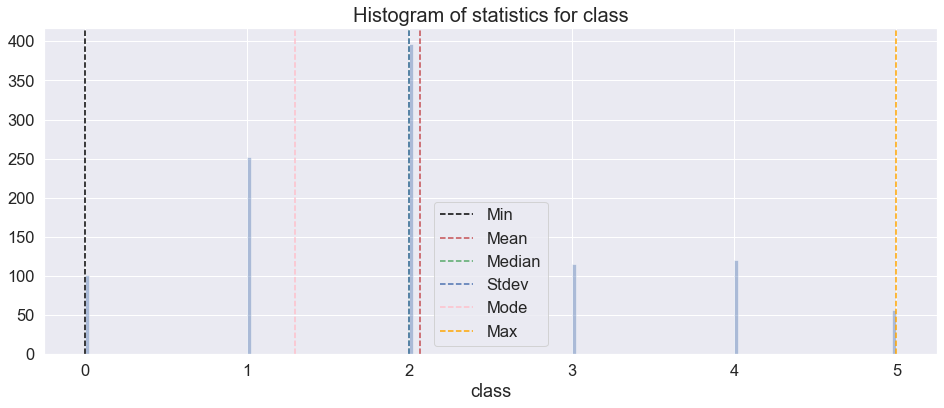

In [249]:
plt.figure(figsize=(16, 6))
min1 = vids['class'].min()
mean = vids['class'].mean()
median = vids['class'].median()
stdev = vids['class'].std()
mode = vids['class'].mode().get_values()[0]
max1 = vids['class'].max()

a = sns.distplot(vids['class'], bins=200, kde=False)
a.axvline(min1, color='black', linestyle='--')
a.axvline(mean, color='r', linestyle='--')
a.axvline(median, color='g', linestyle='--')
a.axvline(mode, color='b', linestyle='--')
a.axvline(stdev, color='pink', linestyle='--')
a.axvline(max1, color='orange', linestyle='--')
a.set_title('Histogram of statistics for class', fontsize=20)
#a.annotate(mean, xy=(2700000, 36))
plt.legend({'Min':min1, 'Mean':mean, 'Median':median, 'Stdev':stdev, 'Mode':mode, 'Max':max1})
print("Min: ", round(min1, 2))
print("Mean: ", round(mean, 2))
print("Median: ", round(median, 2))
print("Standard deviation: ", round(stdev, 2))
print("Mode: ", round(mode, 2))
print("Max: ", round(max1, 2))

Min:  0.1
Mean:  0.17
Median:  0.17
Standard deviation:  0.03
Mode:  0.1
Max:  0.25


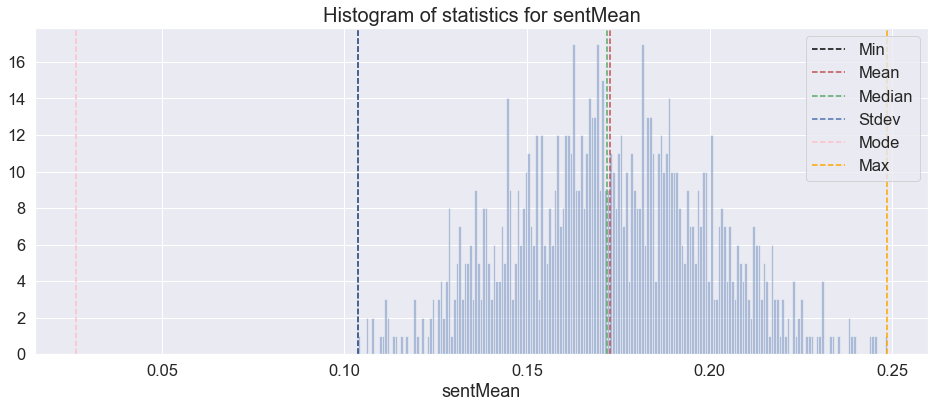

In [250]:
plt.figure(figsize=(16, 6))
min1 = vids['sentMean'].min()
mean = vids['sentMean'].mean()
median = vids['sentMean'].median()
stdev = vids['sentMean'].std()
mode = vids['sentMean'].mode().get_values()[0]
max1 = vids['sentMean'].max()

a = sns.distplot(vids['sentMean'], bins=200, kde=False)
a.axvline(min1, color='black', linestyle='--')
a.axvline(mean, color='r', linestyle='--')
a.axvline(median, color='g', linestyle='--')
a.axvline(mode, color='b', linestyle='--')
a.axvline(stdev, color='pink', linestyle='--')
a.axvline(max1, color='orange', linestyle='--')
a.set_title('Histogram of statistics for sentMean', fontsize=20)
#a.annotate(mean, xy=(2700000, 36))
plt.legend({'Min':min1, 'Mean':mean, 'Median':median, 'Stdev':stdev, 'Mode':mode, 'Max':max1})
print("Min: ", round(min1, 2))
print("Mean: ", round(mean, 2))
print("Median: ", round(median, 2))
print("Standard deviation: ", round(stdev, 2))
print("Mode: ", round(mode, 2))
print("Max: ", round(max1, 2))

Min:  34.93
Mean:  50.7
Median:  49.95
Standard deviation:  6.65
Mode:  47.79
Max:  71.39


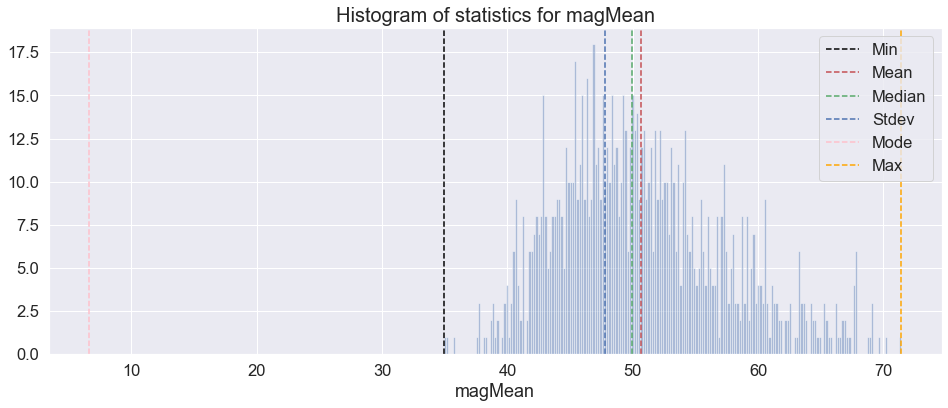

In [251]:
plt.figure(figsize=(16, 6))
min1 = vids['magMean'].min()
mean = vids['magMean'].mean()
median = vids['magMean'].median()
stdev = vids['magMean'].std()
mode = vids['magMean'].mode().get_values()[0]
max1 = vids['magMean'].max()

a = sns.distplot(vids['magMean'], bins=200, kde=False)
a.axvline(min1, color='black', linestyle='--')
a.axvline(mean, color='r', linestyle='--')
a.axvline(median, color='g', linestyle='--')
a.axvline(mode, color='b', linestyle='--')
a.axvline(stdev, color='pink', linestyle='--')
a.axvline(max1, color='orange', linestyle='--')
a.set_title('Histogram of statistics for magMean', fontsize=20)
#a.annotate(mean, xy=(2700000, 36))
plt.legend({'Min':min1, 'Mean':mean, 'Median':median, 'Stdev':stdev, 'Mode':mode, 'Max':max1})
print("Min: ", round(min1, 2))
print("Mean: ", round(mean, 2))
print("Median: ", round(median, 2))
print("Standard deviation: ", round(stdev, 2))
print("Mode: ", round(mode, 2))
print("Max: ", round(max1, 2))

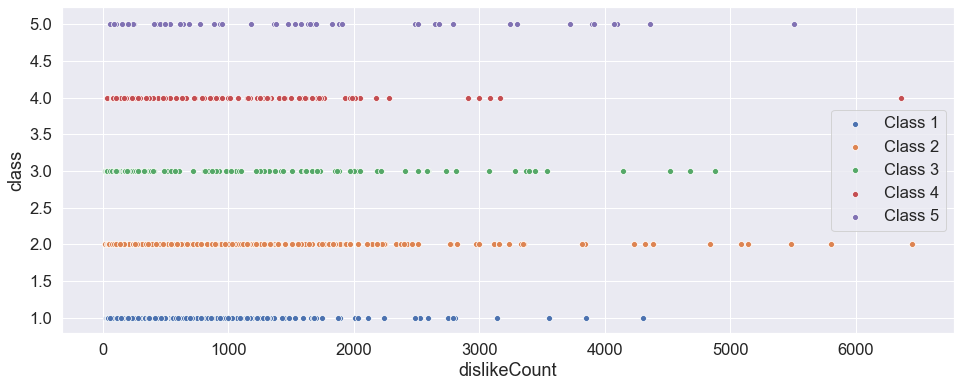

In [204]:
plt.figure(figsize=(16, 6))
clas1 = vids.loc[vids['class'] == 1]
clas2 = vids.loc[vids['class'] == 2]
clas3 = vids.loc[vids['class'] == 3]
clas4 = vids.loc[vids['class'] == 4]
clas5 = vids.loc[vids['class'] == 5]
sns.scatterplot(x='dislikeCount', y='class', data=clas1)
sns.scatterplot(x='dislikeCount', y='class', data=clas2)
sns.scatterplot(x='dislikeCount', y='class', data=clas3)
sns.scatterplot(x='dislikeCount', y='class', data=clas4)
sns.scatterplot(x='dislikeCount', y='class', data=clas5)
plt.legend({'Class 1':clas1, 'Class 2':clas2, 'Class 3':clas3, 'Class 4':clas4, 'Class 5':clas5})

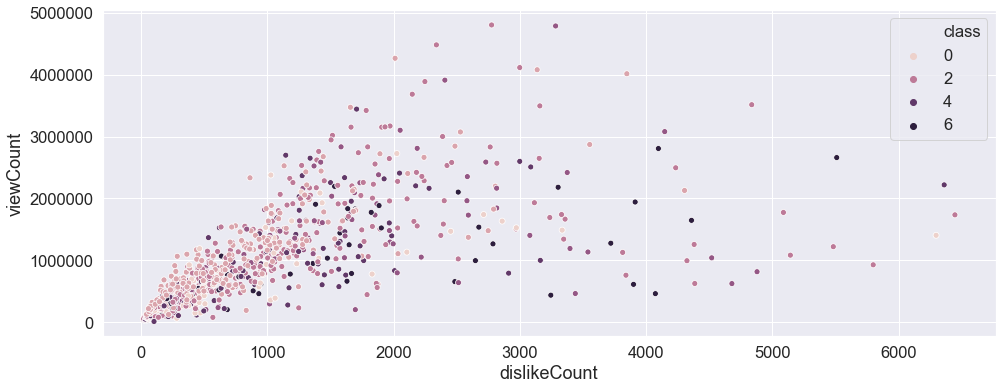

In [253]:
plt.figure(figsize=(16, 6))
sns.scatterplot(x='dislikeCount', y='viewCount', hue='class', data=vids)

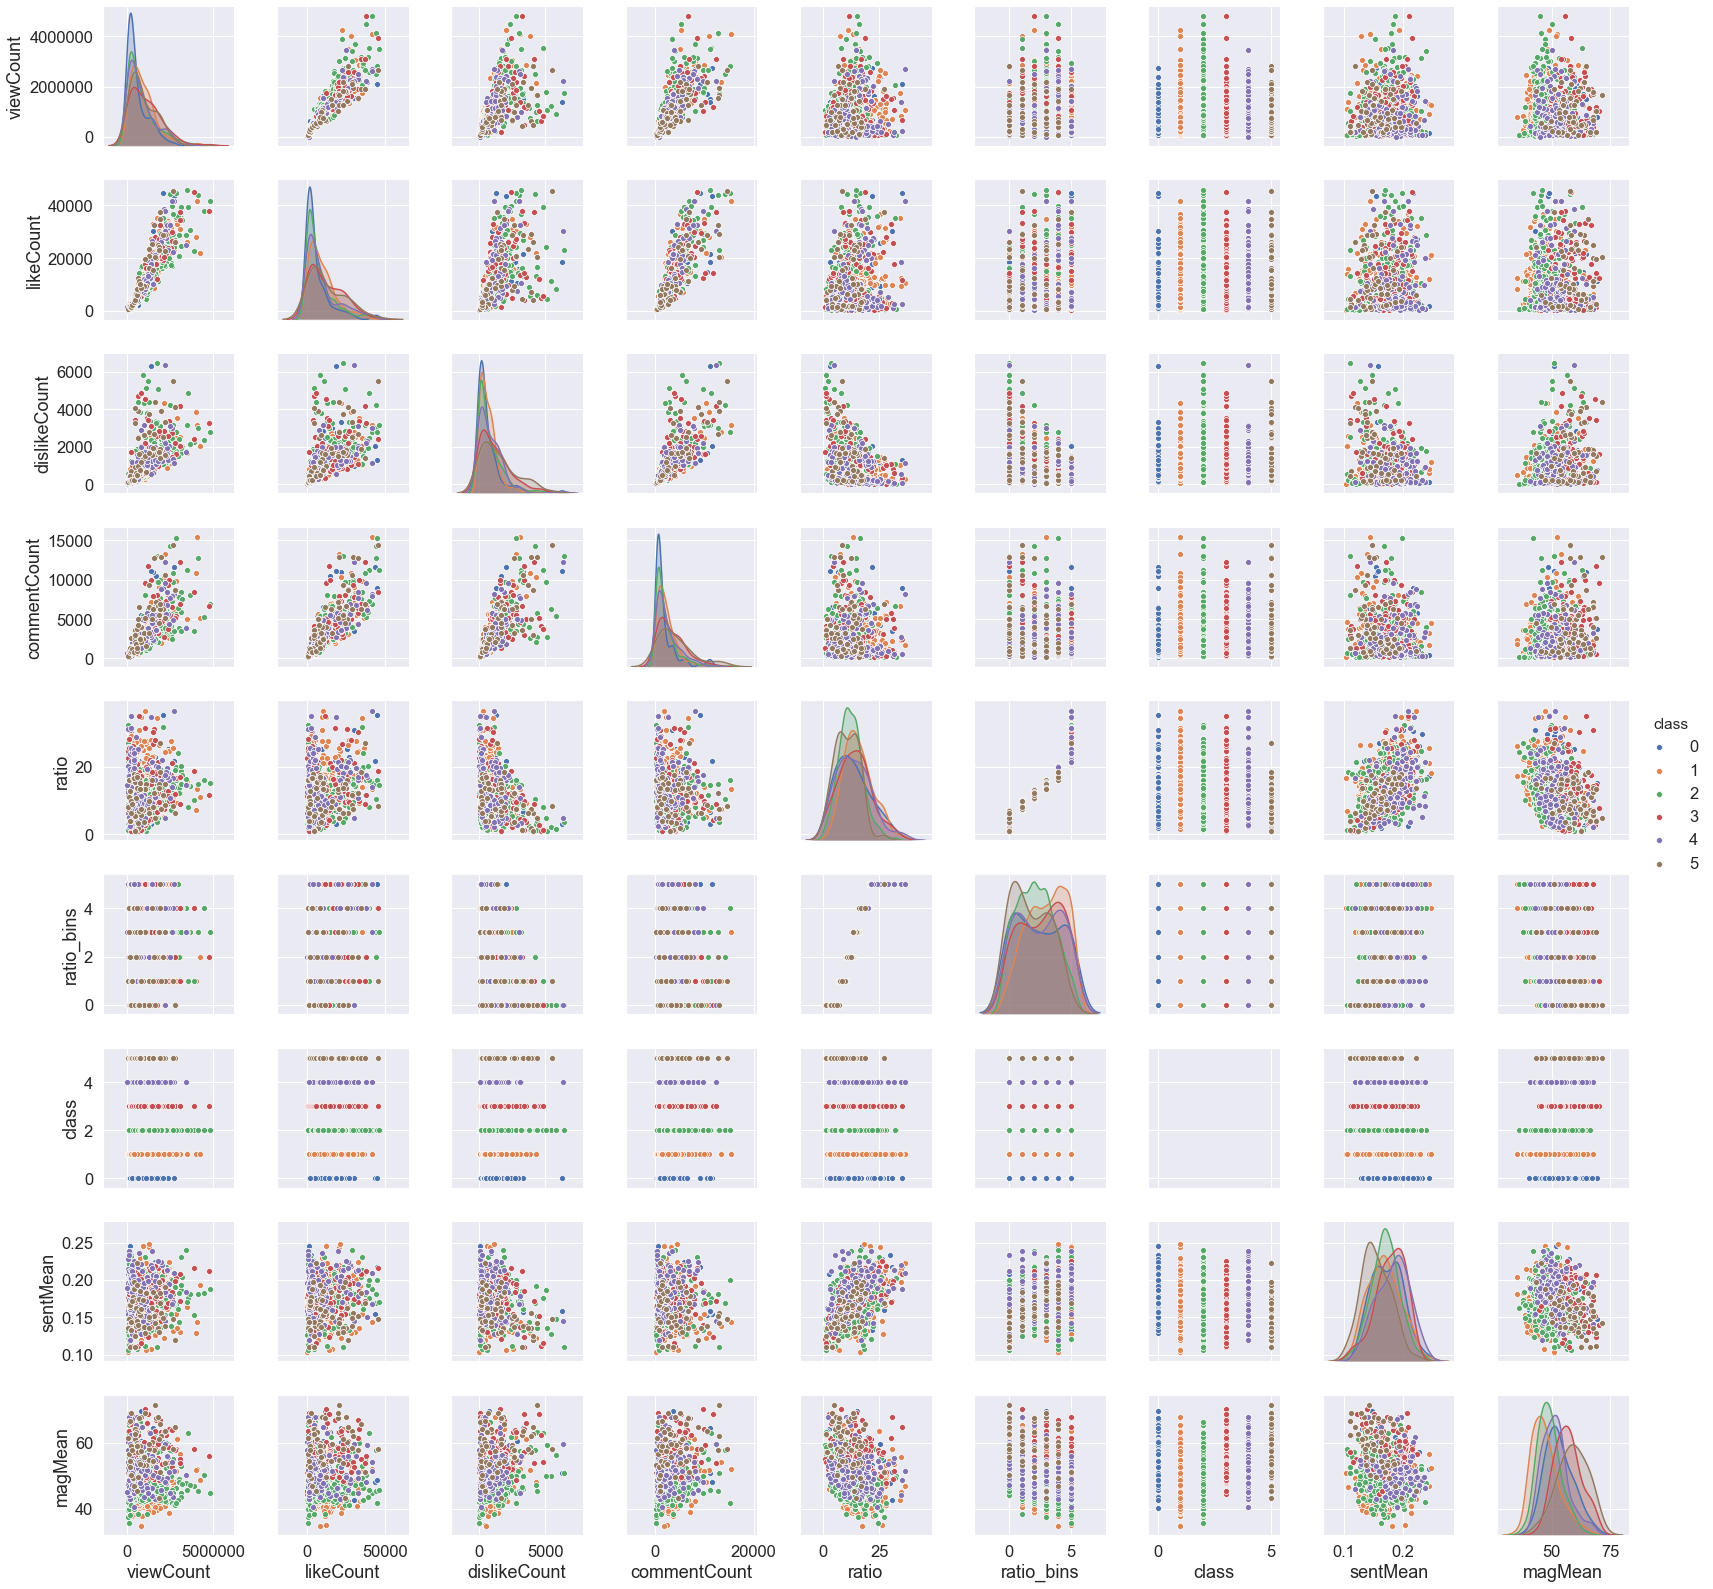

In [202]:
sns.pairplot(vids, vars=['viewCount', 'likeCount', 'dislikeCount', 'commentCount', 'ratio', 'ratio_bins', 'class', 'sentMean', 'magMean'], hue='class')

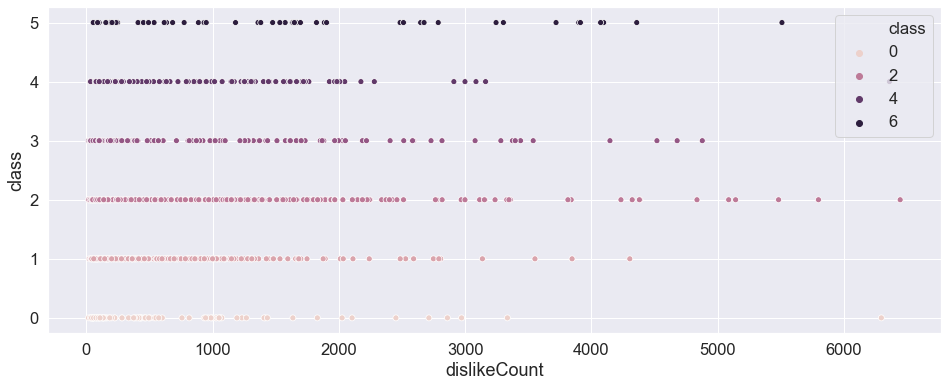

In [214]:
plt.figure(figsize=(16, 6))
sns.scatterplot(x='dislikeCount', y='class', hue='class', data=vids)

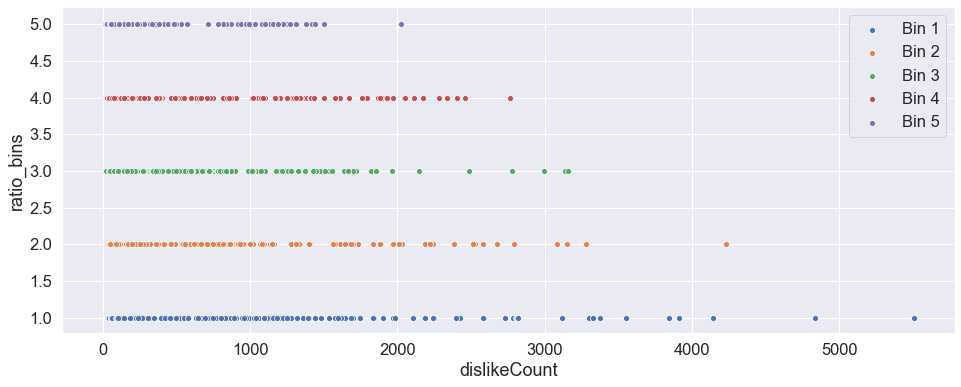

In [262]:
plt.figure(figsize=(16, 6))
clas1 = vids.loc[vids['class'] == 1]
clas2 = vids.loc[vids['class'] == 2]
clas3 = vids.loc[vids['class'] == 3]
clas4 = vids.loc[vids['class'] == 4]
clas5 = vids.loc[vids['class'] == 5]
bin1 = vids.loc[vids['ratio_bins'] == 1]
bin2 = vids.loc[vids['ratio_bins'] == 2]
bin3 = vids.loc[vids['ratio_bins'] == 3]
bin4 = vids.loc[vids['ratio_bins'] == 4]
bin5 = vids.loc[vids['ratio_bins'] == 5]
sns.scatterplot(x='dislikeCount', y='ratio_bins', data=bin1)
sns.scatterplot(x='dislikeCount', y='ratio_bins', data=bin2)
sns.scatterplot(x='dislikeCount', y='ratio_bins', data=bin3)
sns.scatterplot(x='dislikeCount', y='ratio_bins', data=bin4)
sns.scatterplot(x='dislikeCount', y='ratio_bins', data=bin5)
plt.legend({'Bin 1':bin1, 'Bin 2':bin2, 'Bin 3':bin3, 'Bin 4':bin4, 'Bin 5':bin5})